# Exercise 2: Analyzing vegetation indices

## 1. Install dependencies (if you are using a new virtual environment)

Run the commands below to install the dependencies

In [2]:
import sys
!{sys.executable} -m pip install pillow matplotlib scikit-image scikit-learn

     |████████████████████████████████| 7.9 MB 3.8 MB/s eta 0:00:01
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)


## 2. Compute the Normalized Difference Vegetation Index (NDVI) of sentinel images
- Download the Sentinel-2 images from [here](https://drive.google.com/file/d/182kpfk5qJsJuYC80S6olUGnhtkpLaJ6i/view?usp=sharing). The zip file has 5 folders that contain files of 5 different sentinel images acquired in different timestamps. The folder names have the following structure: ***image_year_month***. Read the images using the function ***imread*** of the ***skimage*** library
- Compute NDVI of each image and save it on disk
- Visualize the NDVI image of the sentinel image taken on Aug 2021

In [1]:
# TODO: Fill the directory path where the images were uncompressed
images_path = "images_week2_updated/"
sub_directories = ["image_2020_10", "image_2021_02", "image_2021_04", "image_2021_06", "image_2021_08"]
directories = ["{}{}".format(images_path, subdir) for subdir in sub_directories]

In [2]:
import numpy as np
from skimage.io import imsave, imread

# Compute NDVI of several sentinel images
for directory in directories:
    # Define the full image paths to read the Red and NIR band of each sentinel image
    band4_path = directory + "/band4.jp2" # Red
    band8_path = directory + "/band8.jp2" # Near-infrared (NIR)
    
    # Read images
    band4_array = imread(band4_path).astype(np.float32)
    band8_array = imread(band8_path).astype(np.float32)
    
    # TODO: compute NDVI indexes
    ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)
    
    # Save NDVI image
    ndvi_path = directory + "/ndvi.tif".format(directory)
    imsave(ndvi_path, ndvi_array)
    print("Image saved in: " + ndvi_path)

/var/folders/mz/m5zdnl0n7_s8dyb8ttkdvtc40000gn/T/ipykernel_82927/4291413011.py:15: RuntimeWarning: invalid value encountered in true_divide
  ndvi_array = (band8_array - band4_array) / (band8_array + band4_array)


Image saved in: images_week2_updated/image_2020_10/ndvi.tif
Image saved in: images_week2_updated/image_2021_02/ndvi.tif
Image saved in: images_week2_updated/image_2021_04/ndvi.tif
Image saved in: images_week2_updated/image_2021_06/ndvi.tif
Image saved in: images_week2_updated/image_2021_08/ndvi.tif


Now, let's visualize the NDVI images

In [3]:
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap

def plot_vegetation_index(image_arr):
    # Remove outliers
    p_min, p_max = np.percentile(image_arr[~np.isnan(image_arr)], (2, 98))
    image_arr_clipped = image_arr.clip(p_min, p_max)
    # Create a color map
    cmap_rg=LinearSegmentedColormap.from_list('rg',
                        ["red", "yellow", "green", "darkgreen"], N=256) 
    # Show image
    plt.imshow(image_arr_clipped, cmap=cmap_rg)
    plt.colorbar()

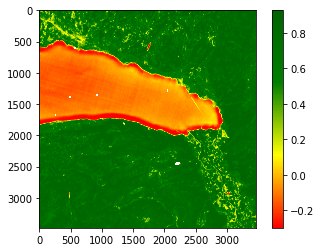

In [4]:
# TODO: Visualize the NDVI image (that you saved on disk in previous code blocks) 
#       of the sentinel image taken on Aug 2021,
#       using the function plot_vegetation_index (defined above)
ndvi_path = images_path + "image_2021_08/ndvi.tif".format(images_path)
ndvi = imread(ndvi_path)
plot_vegetation_index(ndvi)

## 3. Compute and visualize the average NDVI values of 4 regions in the 5 images provided

- Compute the average NDVI of 4 regions (defined by the bounding boxes) in the 5 images provided.
- The sentinel images were taken on Oct 2020, Feb 2021,  Apr 2021, Jun 2021, and Aug 2021.
- The bounding boxes are defined in the pixel coordinate system
- Use the function ***crop_image*** defined below to crop the regions
- Visualize the average NDVI values of the 4 regions as temporal series, using matplotlib. It can help to see the code example presented in slide 4 of the exercise 2 (available on moodle)

In [5]:
def crop_image_array(image_array, y_min, x_min, y_max, x_max):
    """
    Crop image array, delimited by a bounding box
    
    Parameters
    ==================
    
    y_min: int
        Minimum vertical coordinate of the bounding box
    x_min: int
        Minimum horizontal coordinate of the bounding box
    y_max: int
        Maximum vertical coordinate of the bounding box
    x_max: int
        Maximum horizontal coordinate of the bounding box
    
    """
    return image_array[y_min:y_max+1, x_min:x_max+1]

In [6]:
# Bounding boxes of the regions to be analyzed
bounding_boxes = {'vineyard':    {'y_min': 814, 'x_min': 1509, 'y_max': 818, 'x_max': 1513}, 
                  'trees':       {'y_min': 3173, 'x_min': 3239, 'y_max': 3177, 'x_max': 3243}, 
                  'sport_field': {'y_min': 1278, 'x_min': 2628, 'y_max': 1282, 'x_max': 2632}, 
                  'buildings':   {'y_min': 1511, 'x_min': 2794, 'y_max': 1515, 'x_max': 2798}
                 }

In [7]:
# TODO: Compute the average NDVI values 
#       of the 4 regions in the 5 images (sorted in chronological order),
#       and stored it in a dictionary with the following structure. 
#
# ndvi_values = {
#   "vineyard" : [avg_ndvi_of_region_vineyard_in_image1, 
#                 avg_ndvi_of_region_vineyard_in_image2, 
#                ..., 
#                avg_ndvi_of_region_vineyard_in_image5]
#
#   "trees" :    [avg_ndvi_of_region_trees_in_image1, 
#                 avg_ndvi_of_region_trees_in_image2, 
#                ..., 
#                avg_ndvi_of_region_trees_in_image5]
#
#   "buildings" : [avg_ndvi_on_region_buildings_in_image1, 
#                 avg_ndvi_on_region_buildings_in_image2, 
#                ..., 
#                avg_ndvi_on_region_buildings_in_image5]
#
#   "sport_field" : [avg_ndvi_on_region_sport_field_in_image1, 
#                 avg_ndvi_on_region_sport_field_in_image2, 
#                ..., 
#                avg_ndvi_on_region_sport_field_in_image5]
# }

# Create an empty dictionary
ndvi_values = {}
# Iterate over all the regions. 
# The function ".keys()" retrieves the keys of a dictionary
# In the code below bounding_boxes.keys() = ["vineyard", "trees", "buildings", "sport_field"]
for region in bounding_boxes.keys():
    ndvi_values[region] = []
    for directory in directories:
        # TODO: Read the NDVI images you saved
        input_ndvi_path = directory + "/ndvi.tif"
        ndvi_array = imread(input_ndvi_path)
        
        # TODO: Crop image using the bounding box of each "region" 
        #       Use the function "crop_image_array" defined above
        y_min = bounding_boxes[region]["y_min"]
        y_max = bounding_boxes[region]["y_max"] 
        x_min = bounding_boxes[region]["x_min"]
        x_max = bounding_boxes[region]["x_max"] 
        crop_ndvi_array = crop_image_array(ndvi_array, y_min, x_min, y_max, x_max)
        
        # TODO: Compute average NDVI value for the cropped region (using np.mean)
        avg_ndvi = np.mean(crop_ndvi_array)
        
        # TODO: Add the computed average NDVI value to the list ndvi_values[region]
        ndvi_values[region].append(avg_ndvi)

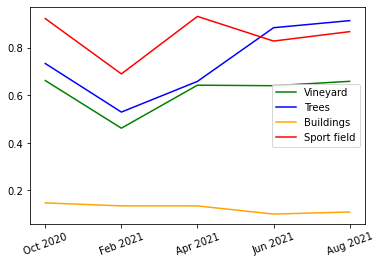

In [8]:
# TODO: Plot the computed average NDVI values of the 4 regions in the 5 images
#       follow the example of the slides of the exercise 2 (available on moodle)
x = np.arange(5)
plt.plot(x, ndvi_values["vineyard"], label='Vineyard', color='green')
plt.plot(x, ndvi_values["trees"], label='Trees', color='blue')
plt.plot(x, ndvi_values["buildings"], label='Buildings', color='orange')
plt.plot(x, ndvi_values["sport_field"], label='Sport field', color='red')
plt.xticks(x, ['Oct 2020', 'Feb 2021', 'Apr 2021', 'Jun 2021', 'Aug 2021'], rotation=20)
plt.legend()

## 4. Answer the remaining questions of the PDF instructions file